<p align="center">
  <img src="https://logodownload.org/wp-content/uploads/2018/04/ufrn-logo.png" width="200" />
</p>

### <center> **Geração de Código em Python e Experimentos com Redes Neurais de Múltiplas Camadas (MLPs).** </center>

**Discentes:** AYSLENON CÂMARA DE MOURA SILVEIRA e VINÍCIUS VENCESLAU VENANCIO DA PENHA

**Docente:** JOSE ALFREDO FERREIRA COSTA

**Disciplina:** **ELE0606** - Tópicos Especiais em Inteligência Artificial

Este documento descreve uma metodologia para o desenvolvimento de código em Python e a realização de experimentos envolvendo Redes Neurais de Múltiplas Camadas (MLPs).

Nesse contexto, a pesquisa focalizará na exploração da base de dados da **Yale Face Database**, direcionando-se para a identificação de expressões faciais e características específicas em retratos.

Outrossim, aborda-se no trabalho a criação completa de algoritmos a partir do zero, incluindo o desenvolvimento integral do código para backpropagation ou outros algoritmos. Isso engloba desde a configuração inicial até a aplicação total do algoritmo.

Ademais, o estudo contempla a utilização de bibliotecas consolidadas, como **scikit-learn**, TensorFlow e Keras, para implementações que se baseiam em métodos já existentes, explorando suas funcionalidades e adaptando-as ao contexto específico do projeto.

O foco principal consiste em realizar uma análise comparativa entre essas abordagens, levando em consideração variáveis como tempo de execução, complexidade na implementação e os resultados alcançados.

*   **29/11** - **fase 1** – mostrar que conseguiu abrir a base, fez pré-processamentos, estudos, organização inicial do trabalho e a estratégia para conclusão.
*   **6/12** – **fase 2** – Relatório e apresentação no grupo, demonstrando execução do código e resultados.

##**Referências:**

[1] **yale_face_database using cnn**. Disponível em: <https://www.kaggle.com/code/rayenbenfathallah/yale-face-database-using-cnn>. Acesso em: 28 de novembro de 2023.

[2] OPENAI. **ChatGPT**. Disponível em: <https://chat.openai.com/auth/login>.

[3] **Exemplo de código em Python para MLP com Deep Learning em Dataset Wine(Classificação)**. Disponível em: <https://youtu.be/BNjRnlDQqOc?si=7W98TcaM2O0MxbE3>. Acesso em: 02 de dezembro 2023.

### **1. Preparação do Ambiente e Dados:**

Realização da leitura e carregamento do arquivo .zip, o qual detém a base de dados que será analisada no projeto.

In [1]:
import zipfile
import os

# Caminho para o arquivo ZIP upado no Google Colab
caminho_arquivo_zip = '/content/Yale_Face_Database.zip'

# Caminho para o diretório de destino que irá conter os arquivos extraídos
caminho_destino = './Yale_Face_Extraido'

# Certifique-se de que o diretório de destino exista ou crie-o
os.makedirs(caminho_destino, exist_ok=True)

# Extrair o arquivo ZIP
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall(caminho_destino)

print(f'Arquivo ZIP extraído em: {caminho_destino}')

Arquivo ZIP extraído em: ./Yale_Face_Extraido


Listar os arquivos presentes no diretório de extração (caminho_extracao) após a extração do arquivo ZIP.

In [2]:
import os

# Listar arquivos no diretório de extração
os.listdir(caminho_destino)

['subject13.surprised',
 'subject15.normal',
 'subject10.sad',
 'subject15.wink',
 'subject11.leftlight',
 'subject11.glasses',
 'subject08.glasses',
 'subject03.sleepy',
 'subject06.wink',
 'subject13.normal',
 'subject01.sad',
 'subject07.sleepy',
 'subject13.happy',
 'subject15.leftlight',
 'subject02.leftlight',
 'subject04.noglasses',
 'subject06.centerlight',
 'subject01.centerlight',
 'subject02.wink',
 'subject06.leftlight',
 'subject14.sad',
 'subject11.sleepy',
 'subject12.leftlight',
 'subject05.sleepy',
 'subject06.normal',
 'subject03.sad',
 'subject10.sleepy',
 'subject05.sad',
 'subject09.rightlight',
 'subject04.normal',
 'subject07.surprised',
 'subject12.glasses',
 'subject14.rightlight',
 'subject12.surprised',
 'subject05.leftlight',
 'subject02.rightlight',
 'subject15.noglasses',
 'subject13.sleepy',
 'subject14.normal',
 'subject06.happy',
 'subject05.surprised',
 'subject09.sad',
 'subject09.surprised',
 'subject10.glasses',
 'subject11.happy',
 'subject13.leftl

Agora, a ideia é produzir um código que permita a visualização deste material.

Portanto, percebe-se que é preciso converter todos os arquivos da base de dados para **.jpg**.

Nesse viés, será aproveitado a pasta presente no banco de dados, denominada '**data**', a qual detém as informações desejadas que serão convertidas.

In [3]:
import os
from PIL import Image

def conversao():
    # Caminhos para os diretórios de entrada e saída
    caminho_dados = './Yale_Face_Extraido/data'
    caminho_dados_convertidos = './Pre_Processo'

    # Verifica se o diretório de saída existe; se não, cria-o
    if not os.path.isdir(caminho_dados_convertidos):
        os.mkdir(caminho_dados_convertidos)

        # Itera pelos arquivos no diretório de entrada
        for nome_do_arquivo in os.listdir(caminho_dados):
            # Verifica se o arquivo não é do tipo gif, txt ou DS_Store
            if not 'gif' in nome_do_arquivo and not 'txt' in nome_do_arquivo and not 'DS_Store' in nome_do_arquivo:
                # Abre a imagem
                imagem = Image.open(caminho_dados + '/' + nome_do_arquivo)
                # Obtém o número do sujeito da imagem
                nome_da_classe = nome_do_arquivo.split('.')[1]
                # Define o caminho para a imagem convertida
                caminho_da_imagem = caminho_dados_convertidos + '/' + nome_da_classe + '/' + nome_do_arquivo + '.jpg'

                # Verifica se o diretório para o sujeito existe; se não, cria-o
                if not os.path.isdir(caminho_dados_convertidos + '/' + nome_da_classe):
                    os.mkdir(caminho_dados_convertidos + '/' + nome_da_classe)

                # Verifica se o arquivo convertido não existe; se não, o salva
                if not os.path.isfile(caminho_da_imagem):
                    imagem.save(caminho_da_imagem)
    else:
        print("Procedimento Concluído!")

Execução da função '**conversao**' que realiza a modificação no tipo dos arquivos pertencentes a base de dados.

In [4]:
conversao()

Procedimento Concluído!


Por fim, o código seguinte produz a visualização de uma amostra da base de dados em estudo, sendo a porção escolhida, referente às imagens das **15 pessoas piscando**, ou seja, os arquivos associados à classe **'wink'**.

Vale ressaltar que, a interpretação feita pelos discente foi estabelecer os exemplos de expressões facias como as classes do sistema, sendo assim, **11 padrões de classe**.

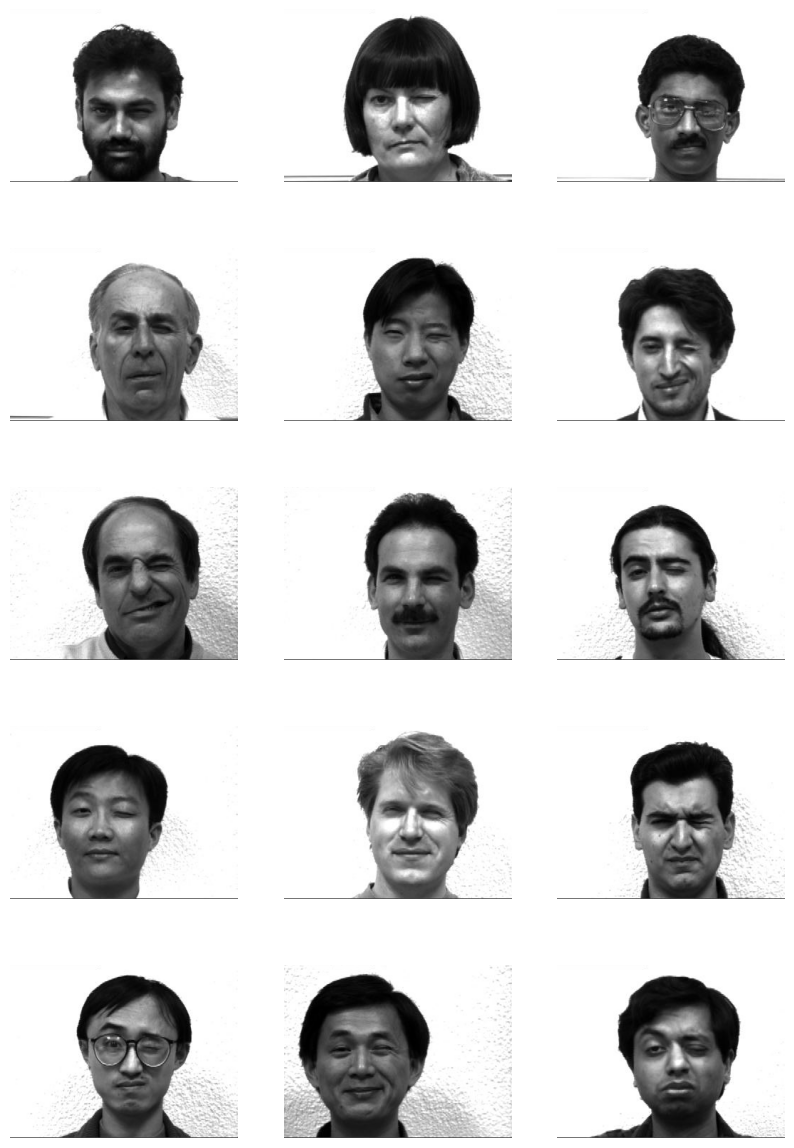

In [5]:
import os
import matplotlib.pyplot as plt
import cv2 as cv

# Caminho para a pasta que contém as imagens
caminho_pasta = './Pre_Processo/wink'

# Obter a lista de arquivos na pasta
arquivos = os.listdir(caminho_pasta)

# Configuração da plotagem das amostras desejadas
num_linhas = 5
num_colunas = 3
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 15))

# Iterar sobre os arquivos e exibir as imagens
for i, arquivo in enumerate(arquivos):
    caminho_imagem = os.path.join(caminho_pasta, arquivo)
    img = cv.imread(caminho_imagem)
    axs[i // num_colunas, i % num_colunas].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axs[i // num_colunas, i % num_colunas].axis('off')  # Desativar os eixos

plt.show()

### **2. Separação dos Dados para Treinamento e Teste:**

Criação de um dataframe contendo o **nome do arquivo**, '**subject**' (número da pessoa) e **classe**.

In [6]:
import pandas as pd
import os

# Caminho dos dados pela pasta 'data'
caminho_dados = './Yale_Face_Extraido/data'

# Listar todos os arquivos no diretório
arquivos = os.listdir(caminho_dados)

# Filtrar apenas os arquivos que começam com 'subject'
arquivos_filtrados = [arq for arq in arquivos if arq.startswith('subject')]

# Criação do DataFrame com os nomes dos arquivos filtrados
dados = pd.DataFrame(arquivos_filtrados, columns=['arquivo'])

# Separar os componentes do nome do arquivo
dados[['subject', 'classe']] = dados['arquivo'].str.split(pat=".", n=1, expand=True)
dados['subject'] = dados['subject'].str.replace('subject', '', regex=False)

# Remover linhas com valores ausentes (NaN)
dados.dropna(subset=['subject'], inplace=True)

# Converter a coluna 'subject' para valores inteiros
dados['subject'] = dados['subject'].astype(int)

# Mostrar o DataFrame resultante
display(dados.head())
print('\n')

display(dados.tail())
print('\n')

display(dados['subject'].unique())

,arquivo,subject,classe
0,subject13.surprised,13,surprised
1,subject15.normal,15,normal
2,subject10.sad,10,sad
3,subject15.wink,15,wink
4,subject11.leftlight,11,leftlight


,arquivo,subject,classe
160,subject11.surprised,11,surprised
161,subject01.rightlight,1,rightlight
162,subject05.noglasses,5,noglasses
163,subject08.noglasses,8,noglasses
164,subject10.noglasses,10,noglasses


array([13, 15, 10, 11,  8,  3,  6,  1,  7,  2,  4, 14, 12,  5,  9])

Nessa perspectiva, executa-se a divisão entre os dados, os quais serão fornecidos à máquina futuramente.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

total_de_classes = 11
total_de_imagens = dados["subject"].count()
expressoes_faciais = ['centerlight', 'glasses', 'happy', 'leflight', 'noglasses', 'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink']

y = dados['classe']

# Aplicar codificação one-hot na coluna 'classe'
encoded_y = pd.get_dummies(dados['classe'])

# Separar 'X' sem a coluna 'classe' e 'arquivo', uma vez que são compostos por strings
X = dados.drop('classe', axis=1)
X1 = X.drop('arquivo', axis =1)

# Normalização dos dados
scaler = MinMaxScaler()
Xn = scaler.fit_transform(X1)

# Unir 'Xn' (dados normalizados) com as expressões faciais codificadas
X_encoded = np.concatenate((Xn, encoded_y), axis=1)

# Separar os dados para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, stratify=y)

### 3. **Criação da MLP:**

O tópico 3 traz o desenvolvimento da MLP, usando a biblioteca **scikit-learn**, tendo em vista a praticidade que esta ferramenta detém.

Posteriormente, ocorre a validação e análise do modelo, sendo feita a plotagem das matrizes confusões com o uso da biblioteca **seaborn** e **matplotlib**, bem como o valor da média entre as acurácias do sistema por meio da própria **scikit-learn**.

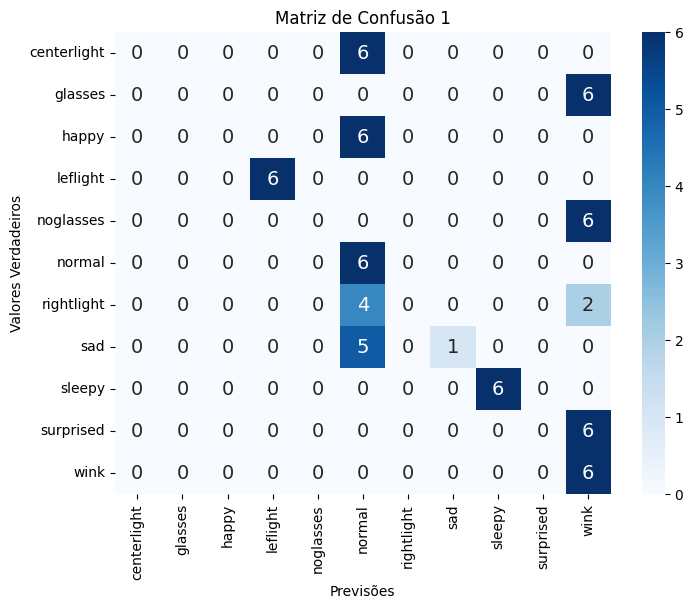

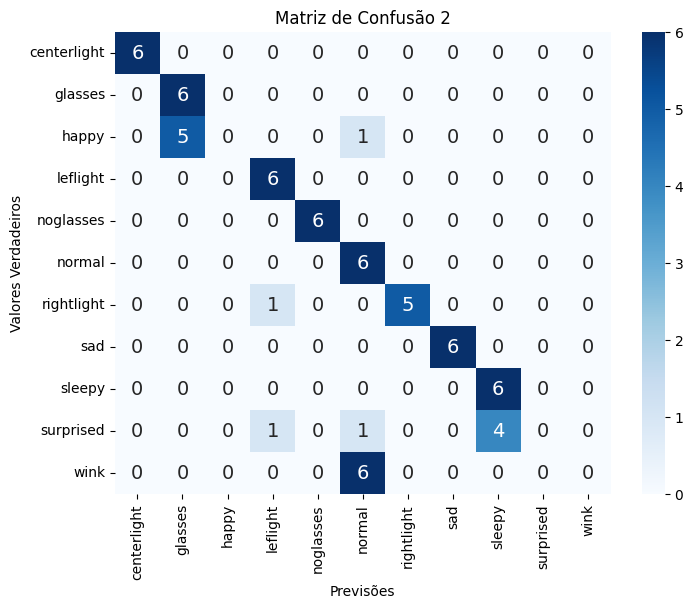

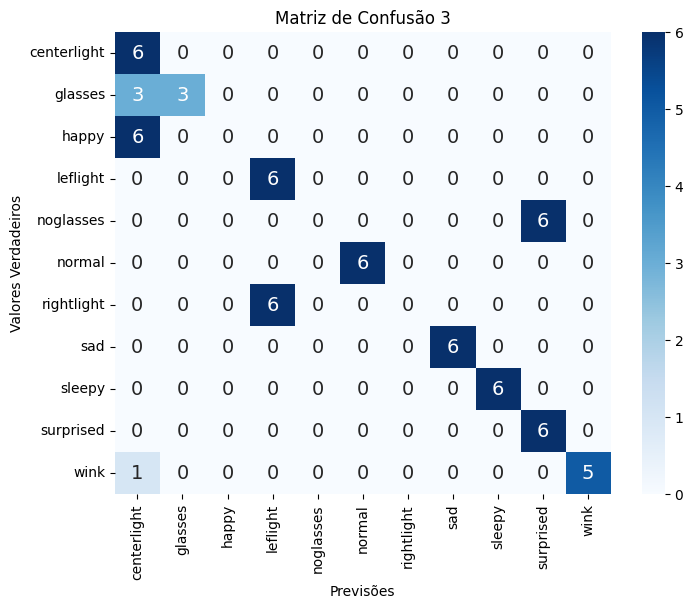

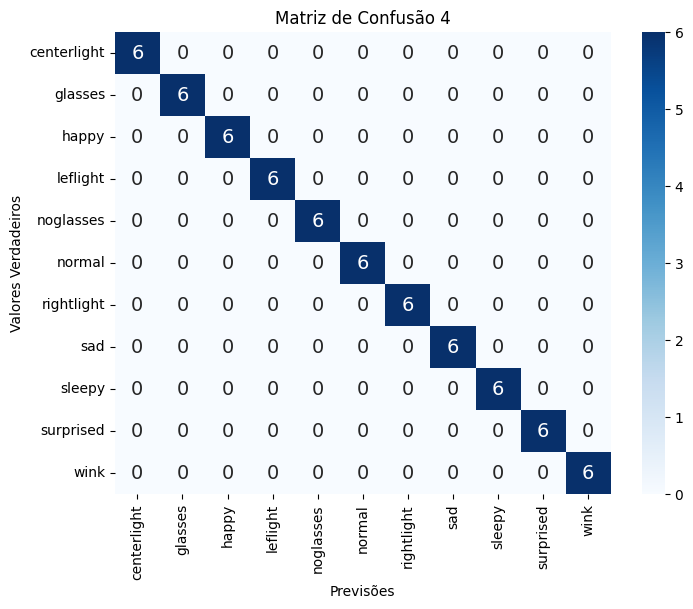

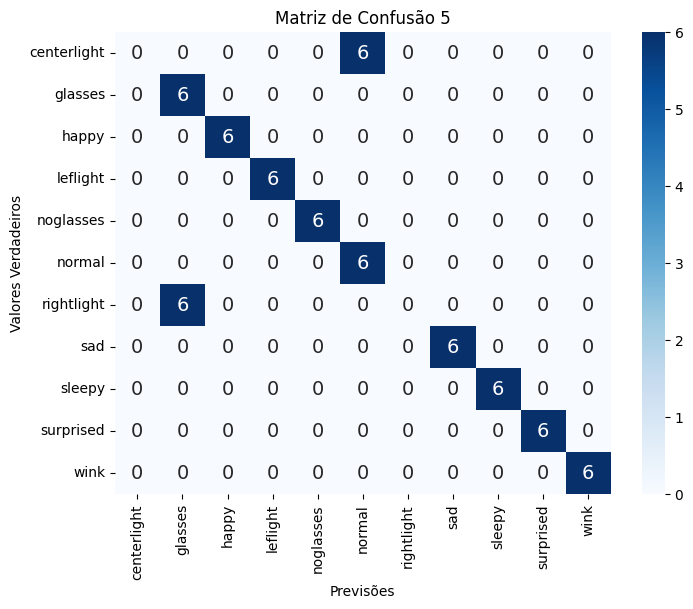



Média da Acurácia do Modelo MLP: 0.7151515151515151
Média do Tempo de Treinamento: 0.13404459953308107 segundos


              precision    recall  f1-score   support

 centerlight       0.00      0.00      0.00         6
     glasses       0.50      1.00      0.67         6
       happy       1.00      1.00      1.00         6
    leflight       1.00      1.00      1.00         6
   noglasses       1.00      1.00      1.00         6
      normal       0.50      1.00      0.67         6
  rightlight       0.00      0.00      0.00         6
         sad       1.00      1.00      1.00         6
      sleepy       1.00      1.00      1.00         6
   surprised       1.00      1.00      1.00         6
        wink       1.00      1.00      1.00         6

    accuracy                           0.82        66
   macro avg       0.73      0.82      0.76        66
weighted avg       0.73      0.82      0.76        66



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Número de vezes que você deseja repetir o treinamento para calcular a média
num_execucoes = 5
acuracias = []
tempo_treinos = []

# Desativar os warnings de convergência temporariamente
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for n in range(num_execucoes):

    # Passo 1: Criação do Modelo MLP
    mlp = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', max_iter=100)

    # Passo 2: Treinamento do Modelo
    inicio_tempo = time.time()
    mlp.fit(X_train, y_train)
    final_tempo = time.time()
    tempo_treino = final_tempo - inicio_tempo
    tempo_treinos.append(tempo_treino)

    # Passo 3: Avaliação da Acurácia
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acuracias.append(acc)

    # Passo 4: Criação da matriz confusão
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, xticklabels=expressoes_faciais, yticklabels=expressoes_faciais)

    plt.xlabel('Previsões')
    plt.ylabel('Valores Verdadeiros')
    plt.title(f'Matriz de Confusão {n+1}')
    plt.show()
    print('\n')

# Calculando a média das acurácias e do tempo de treinamento
media_acuracias = sum(acuracias) / num_execucoes
media_tempo_treino = sum(tempo_treinos) / num_execucoes

# Exibindo resultado da média das acurácias e tempos de treinamentos
print("Média da Acurácia do Modelo MLP:", media_acuracias)
print("Média do Tempo de Treinamento:", media_tempo_treino, "segundos")
print('\n')

# Exibindo relatório de classificação da quinta iteração e/ou execução
relatorio_de_classificacao = classification_report(y_test, y_pred, target_names=expressoes_faciais)
print(relatorio_de_classificacao)